In [2]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
import numpy as np


In [3]:
def plot_threshold_results(data):
    colors = sns.color_palette("husl", 3)
    sns.set(style="darkgrid")
    plt.figure(figsize=(12, 6))
    ax = plt.gca()

    thresholds = [float(t) for t in data.keys()]
    f1s = [d['f1'] for d in data.values()]
    recalls = [d['recall'] for d in data.values()]
    precisions = [d['precision'] for d in data.values()]

    data = {
        "F1": f1s,
        "Recall": recalls,
        "Precision": precisions,
    }

    for i, (label, scores) in enumerate(data.items()):
        # Plot the losses
        ax.plot(thresholds, scores, color=colors[i], label=label)
        ax.set_title('Loss per Epoch')
        ax.set_xlabel('Threshold')
        ax.set_ylabel('Score')
        ax.set_xticks(np.arange(0, 1, 0.1))
        ax.tick_params(axis='both', which='major', labelsize=12)
    
    # Find the first threshold where the precision is above 0.9
    threshold_index = next((i for i, precision in enumerate(precisions) if precision > 0.9), None)
    if threshold_index is not None:
        threshold = thresholds[threshold_index]
        ax.axvline(threshold, color='black', linestyle='--')
        ax.text(threshold + 0.01, 0.8, f"Threshold = {threshold:.2f}", fontsize=12)

    ax.legend()
    plt.tight_layout(pad=3)
    plt.show()


In [4]:
def table_threshold_results(data):
    table = PrettyTable()
    table.field_names = ["", "Threshold", "F1", "Recall", "Precision"]

    threshold_index = next((i for i, precision in enumerate(
        [d['precision'] for d in data.values()]) if precision > 0.9), None)

    for i, (threshold, scores) in enumerate(data.items()):
        f1 = scores['f1']
        recall = scores['recall']
        precision = scores['precision']

        if i == threshold_index:
            table.add_row(["\u2192", '\033[1m' + str(threshold) + '\033[0m', '\033[1m' + str(f1) + '\033[0m',
                          '\033[1m' + str(recall) + '\033[0m', '\033[1m' + str(precision) + '\033[0m'])
        else:
            table.add_row(["", threshold, f1, recall, precision])

    print(table)

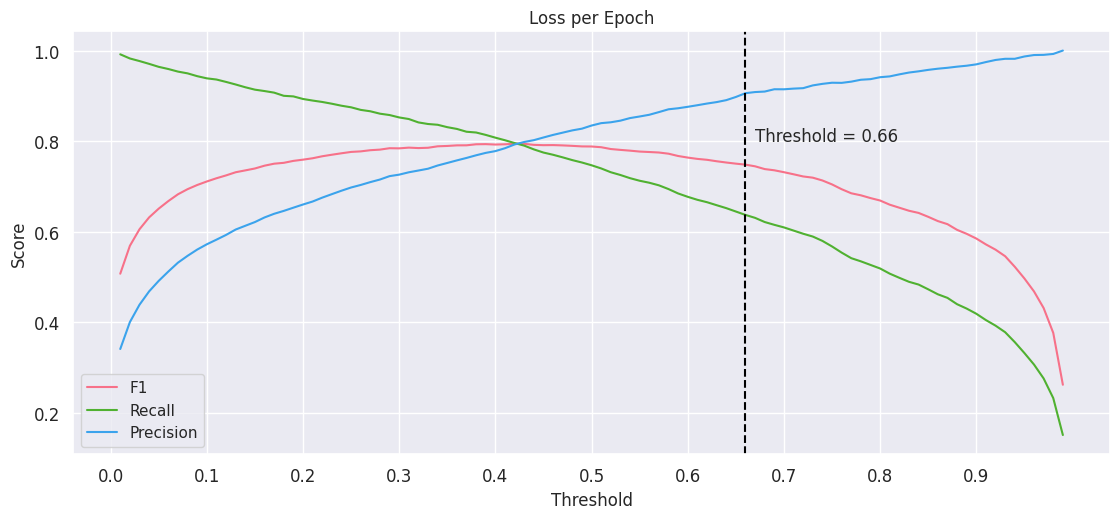

+---+-----------+--------+--------+-----------+
|   | Threshold |   F1   | Recall | Precision |
+---+-----------+--------+--------+-----------+
|   |    0.01   | 0.5069 | 0.9917 |   0.3405  |
|   |    0.02   | 0.5685 | 0.9825 |   0.3999  |
|   |    0.03   | 0.6051 | 0.9768 |   0.4383  |
|   |    0.04   | 0.6313 | 0.9706 |   0.4678  |
|   |    0.05   | 0.6507 | 0.964  |   0.4911  |
|   |    0.06   | 0.6674 | 0.9592 |   0.5117  |
|   |    0.07   | 0.6824 | 0.9535 |   0.5313  |
|   |    0.08   | 0.6937 | 0.9496 |   0.5464  |
|   |    0.09   | 0.7029 | 0.9434 |   0.5602  |
|   |    0.1    | 0.7107 | 0.9386 |   0.5719  |
|   |    0.11   | 0.7178 | 0.936  |   0.5821  |
|   |    0.12   | 0.7241 | 0.9307 |   0.5926  |
|   |    0.13   | 0.7311 | 0.925  |   0.6045  |
|   |    0.14   | 0.7352 | 0.9189 |   0.6128  |
|   |    0.15   | 0.7394 | 0.9136 |   0.621   |
|   |    0.16   | 0.7456 | 0.9105 |   0.6312  |
|   |    0.17   |  0.75  | 0.907  |   0.6393  |
|   |    0.18   | 0.7519 |  0.9   |   0.

In [5]:
json_path = '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/saved/ALBERT-Clean/lightning_logs/blank/checkpoints/converted/epoch=7-step=23848_threshold_results.json'
with open(json_path, 'r') as f:
    data = json.load(f)

plot_threshold_results(data)
table_threshold_results(data)